In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [92]:
ibm_hr_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(f'# of rows & columns in the data set: {ibm_hr_df.shape}')

# of rows & columns in the data set: (1470, 35)


In [93]:
ibm_hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [94]:
ibm_hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
for col in ibm_hr_df.columns:
    if len(ibm_hr_df[col].unique())<=10:
        print(ibm_hr_df[col].unique())
        print()

['Yes' 'No']

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

['Sales' 'Research & Development' 'Human Resources']

[2 1 4 3 5]

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

[1]

[2 3 4 1]

['Female' 'Male']

[3 2 4 1]

[2 1 3 4 5]

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

[4 2 3 1]

['Single' 'Married' 'Divorced']

[8 1 6 9 0 4 5 2 7 3]

['Y']

['Yes' 'No']

[3 4]

[1 4 2 3]

[80]

[0 1 3 2]

[0 3 2 5 1 4 6]

[1 3 2 4]



<Axes: xlabel='Attrition', ylabel='count'>

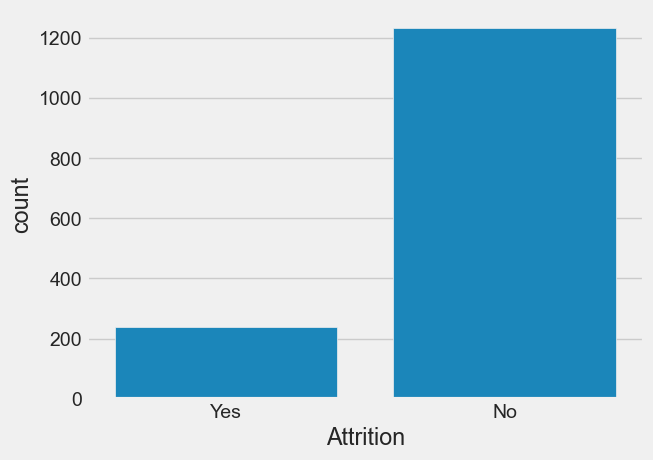

In [106]:
sns.countplot(x='Attrition', data=ibm_hr_df)

In [107]:
# axis="columns" >> 열을 기준으로 삭제
# inplace=True >> 원본 DataFrame에서 삭제
ibm_hr_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for col in ibm_hr_df.columns:
    if ibm_hr_df[col].dtype==object and len(ibm_hr_df[col].unique())<=50:
        categorical_col.append(col)

In [103]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [104]:
ibm_hr_df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [116]:
for col in categorical_col:
    print(f'[ {col} ] dtype : {ibm_hr_df[col].dtype}')
    print(ibm_hr_df[col].unique())
    print()

[ BusinessTravel ] dtype : object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

[ Department ] dtype : object
['Sales' 'Research & Development' 'Human Resources']

[ EducationField ] dtype : object
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

[ Gender ] dtype : object
['Female' 'Male']

[ JobRole ] dtype : object
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

[ MaritalStatus ] dtype : object
['Single' 'Married' 'Divorced']

[ OverTime ] dtype : object
['Yes' 'No']



In [111]:
# Attrition을 범주형 데이터로 전환
ibm_hr_df['Attrition'] = ibm_hr_df.Attrition.astype("category")

In [112]:
ibm_hr_df.Attrition.unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [113]:
ibm_hr_df.Attrition.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [117]:
# 범주형 데이터를 숫자형 코드로 변환
ibm_hr_df['Attrition'] = ibm_hr_df.Attrition.cat.codes

In [118]:
ibm_hr_df.Attrition.unique()

array([1, 0], dtype=int8)

In [ ]:
categorical_col.remove('Attrition')

In [119]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [124]:
X = ibm_hr_df.filter(items=categorical_col)
Y = ibm_hr_df['Attrition']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
classifier_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [137]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=categorical_col)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [139]:

classifier_3.fit(X_train, Y_train)

print('Training set score: {:.4f}'.format(classifier_3.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(classifier_3.score(X_test, Y_test)))

Training set score: 0.8367
Test set score: 0.8617


In [140]:
# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]}, 
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)

  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


In [141]:
# 엔트로피
def entropy(target_col):
    _, counts = np.unique(target_col, return_counts = True)
    total_count = np.sum(counts)
    entropy = -np.sum([count/total_count * np.log2(count/total_count) for count in counts])
    return entropy

In [142]:
print('H(x) = ', round(entropy(target), 5))

H(x) =  0.97095


In [143]:
def InfoGain(data,split_attribute_name,target_name):
 
    # 전체 엔트로피 계산
    total_entropy = entropy(data[target_name])
    print(f'[{target_name}] Entropy(D) = ', round(total_entropy, 5))
    
    # 가중 엔트로피 계산
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                               for i in range(len(vals))])
    print(f'[{split_attribute_name}] Weighted Entropy H(', split_attribute_name, ') = ', round(Weighted_Entropy, 5))
 
    
    # 정보이득 계산
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [144]:
print('InfoGain( no_insects ) = ', round(InfoGain(data, "no_insects", "tree_health"), 5), '\n')
print('InfoGain( no_wilting ) = ', round(InfoGain(data, "no_wilting", "tree_health"), 5), '\n')
print('InfoGain( no_diseases ) = ', round(InfoGain(data, "no_diseases", "tree_health"), 5))

[tree_health] Entropy(D) =  0.97095
[no_insects] Weighted Entropy H( no_insects ) =  0.96355
InfoGain( no_insects ) =  0.0074 

[tree_health] Entropy(D) =  0.97095
[no_wilting] Weighted Entropy H( no_wilting ) =  0.82647
InfoGain( no_wilting ) =  0.14448 

[tree_health] Entropy(D) =  0.97095
[no_diseases] Weighted Entropy H( no_diseases ) =  0.41417
InfoGain( no_diseases ) =  0.55678


In [145]:
# ID3 알고리즘
def ID3(data,originaldata,features,target_attribute_name,parent_node_class = None):
 
    # 중지기준 정의
 
    # 1. 대상 속성이 단일값을 가지면: 해당 대상 속성 반환
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
 
    # 2. 데이터가 없을 때: 원본 데이터에서 최대값을 가지는 대상 속성 반환
    # >> 특정 그룹에서 목표 변수 값이 없으면 예측할 정보가 없음 -> 데이터 보완 필요 -> 최빈값 사용용
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])\
               [np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
 
    # 3. 기술 속성이 없을 때: 부모 노드의 대상 속성 반환
    elif len(features) ==0:
        return parent_node_class
 
    # 트리 성장
    else:
        # 부모노드의 대상 속성 정의(예: Good)
        parent_node_class = np.unique(data[target_attribute_name])\
                            [np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        
        # 데이터를 분할할 속성 선택
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # 트리 구조 생성
        tree = {best_feature:{}}
        
        # 최대 정보이득을 보인 기술 속성 제외
        features = [i for i in features if i != best_feature]
        
        # 가지 성장
        for value in np.unique(data[best_feature]):
            # 데이터 분할. dropna(): 결측값을 가진 행, 열 제거
            sub_data = data.where(data[best_feature] == value).dropna()
            
            # ID3 알고리즘
            subtree = ID3(sub_data,data,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            
        return(tree)

In [146]:
print('numpy.unique: ', np.unique(data["tree_health"], return_counts = True)[1])
print('numpy.max: ', np.max(np.unique(data["tree_health"], return_counts = True)[1]))
print('numpy.argmax: ', np.argmax(np.unique(data["tree_health"], return_counts = True)[1]))

numpy.unique:  [6 4]
numpy.max:  6
numpy.argmax:  0


In [147]:
tree = ID3(data, data, ["no_insects","no_wilting","no_diseases"], "tree_health")
from pprint import pprint
pprint(tree)

[tree_health] Entropy(D) =  0.97095
[no_insects] Weighted Entropy H( no_insects ) =  0.96355
[tree_health] Entropy(D) =  0.97095
[no_wilting] Weighted Entropy H( no_wilting ) =  0.82647
[tree_health] Entropy(D) =  0.97095
[no_diseases] Weighted Entropy H( no_diseases ) =  0.41417
[tree_health] Entropy(D) =  0.59167
[no_insects] Weighted Entropy H( no_insects ) =  0.28571
[tree_health] Entropy(D) =  0.59167
[no_wilting] Weighted Entropy H( no_wilting ) =  0.59167
[tree_health] Entropy(D) =  1.0
[no_wilting] Weighted Entropy H( no_wilting ) =  1.0
{'no_diseases': {'False': 'Poor',
                 'True': {'no_insects': {'False': {'no_wilting': {'True': 'Good'}},
                                         'True': 'Good'}}}}


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

In [ ]:
iris.feature_names

In [ ]:
iris.target_names